# Explore here

In [307]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import math
import utils as eda
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge

url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"
total_data = pd.read_csv(url)  

total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [308]:
#IDENTIFICO VARIABLES
# Variables numéricas
numericas = total_data.select_dtypes(include=['number']).columns.tolist()
print("Variables numéricas:", numericas)

# Variables no numéricas (categóricas, texto, etc.)
no_numericas = total_data.select_dtypes(exclude=['number']).columns.tolist()
print("Variables no numéricas:", no_numericas) 

target = 'charges'
target

Variables numéricas: ['age', 'bmi', 'children', 'charges']
Variables no numéricas: ['sex', 'smoker', 'region']


'charges'

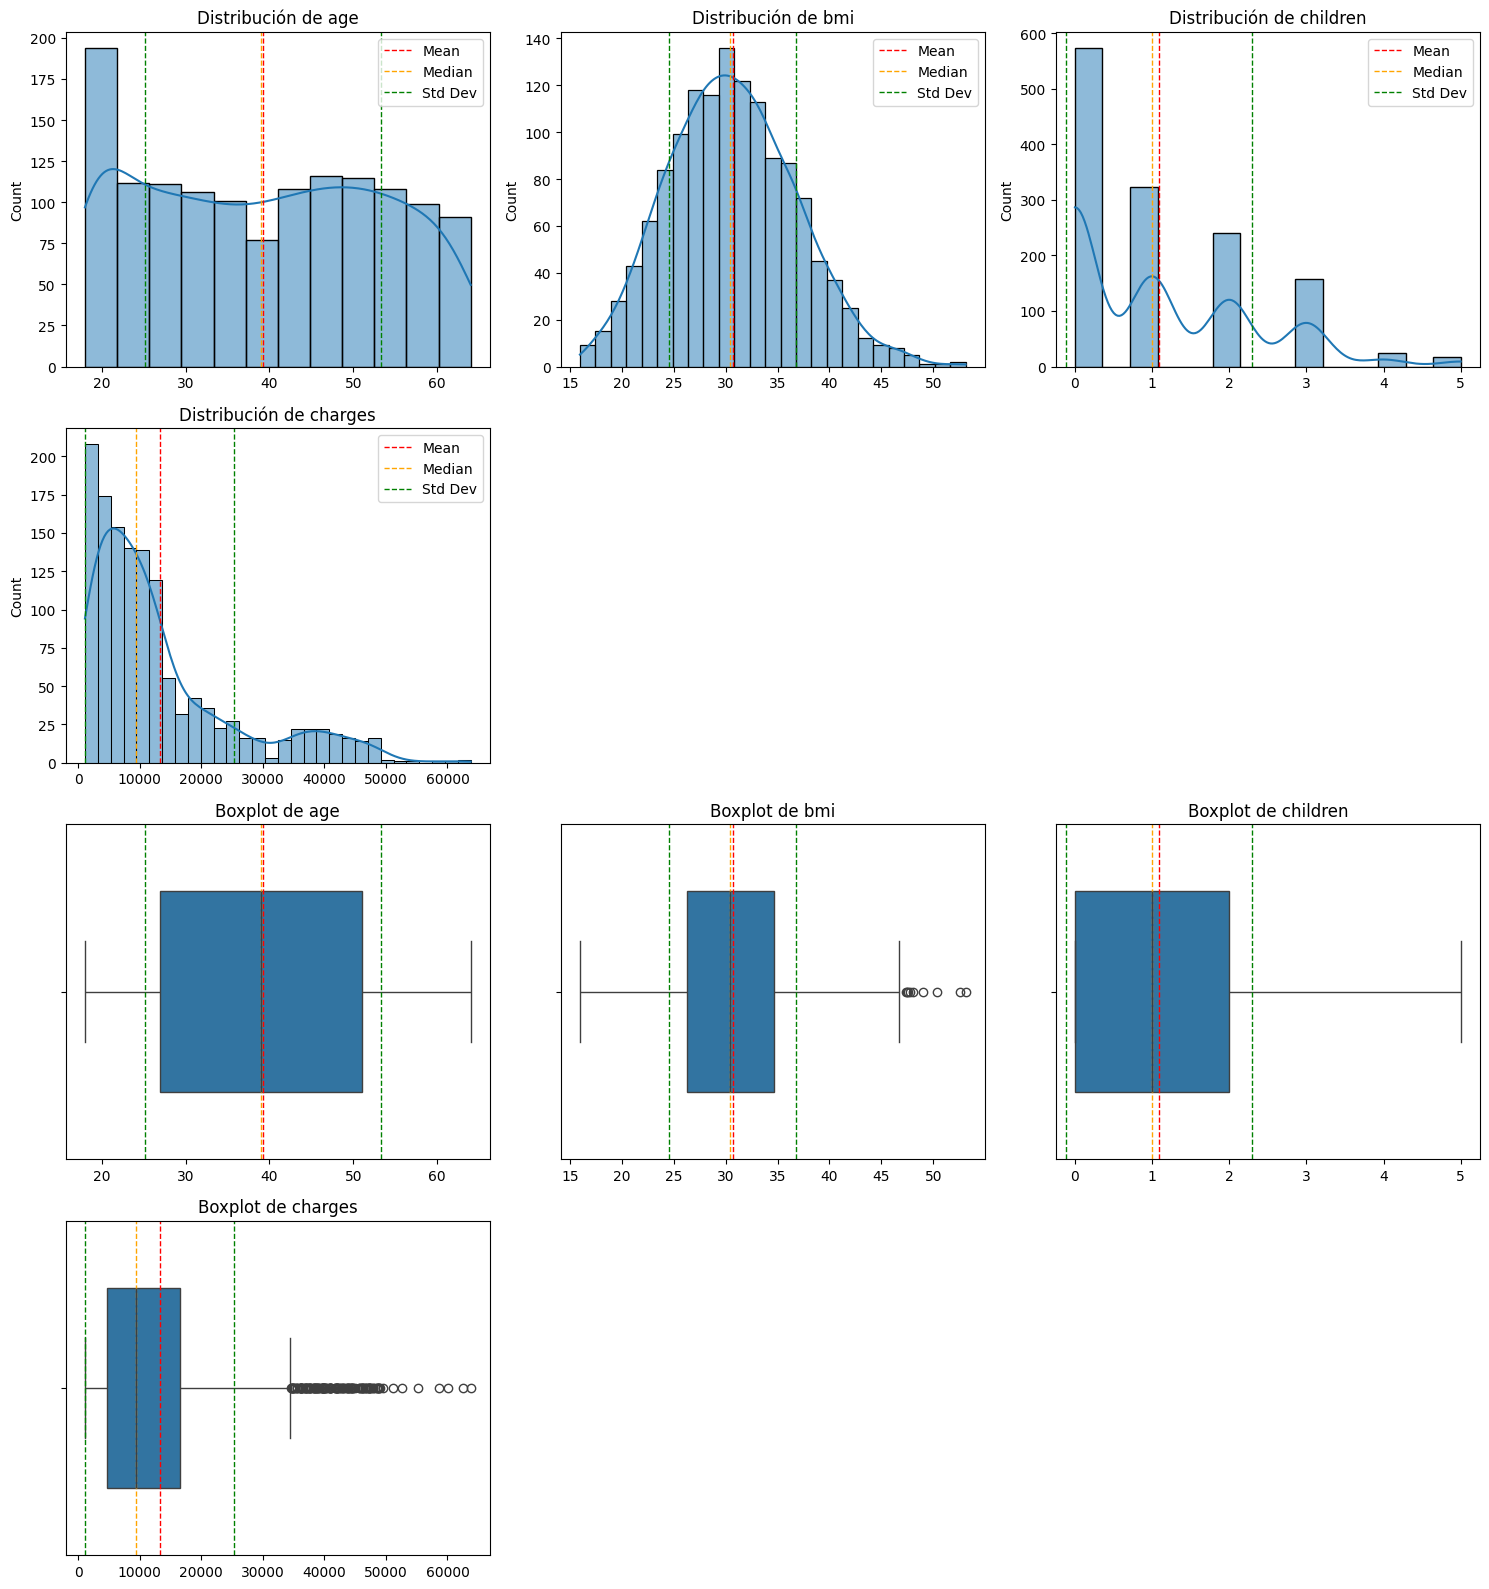

In [309]:
eda.plot_numerical_data(total_data) 

Analisis de resultados: 
1. age:
Probablemente verás que la distribución está sesgada hacia edades jóvenes o adultas jóvenes, con una mediana y media cercanas. La desviación estándar indicara la dispersion de edades. El boxplot puede mostrar si hay valores atípicos.

2. Índice de masa corporal (bmi):
Se puede observar la distribución es simétrica, hay valores extremos (muy bajos o muy altos de 30 ). El boxplot mostrará la dispersión y posibles outliers.

3. children:
Al ser una variable discreta, el histograma mostrará la frecuencia de cada número de hijos. La media y mediana darán una idea del número típico de hijos. El boxplot puede mostrar si hay familias con muchos hijos (outliers).

4. charges:
Esta variable parece muy sesgada, con muchos valores bajos y algunos muy altos. La diferencia entre media y mediana puede ser grande, indicando asimetría. El boxplot muestra
 los valores extremos.

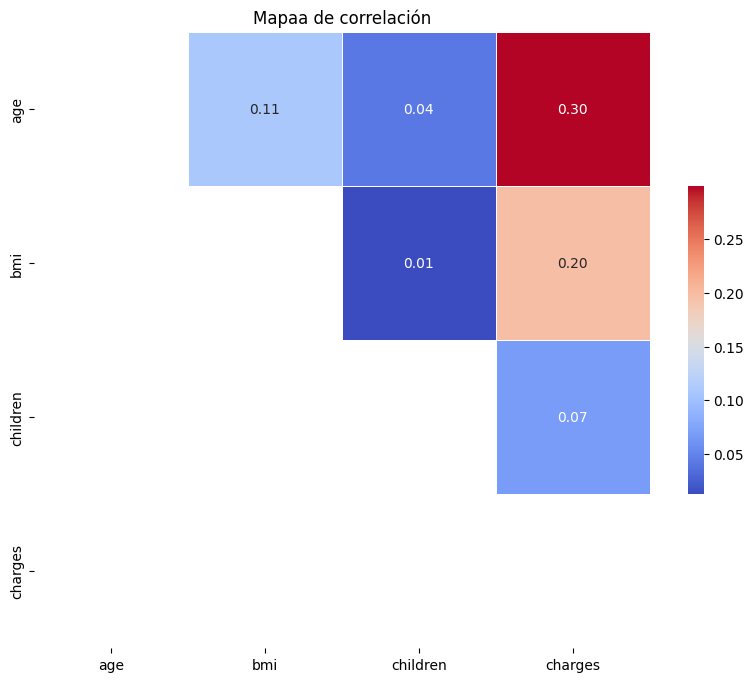

In [310]:
# MAPA DE DE CORRELACION EN VARIABLES NUMENICAS
eda.heatmap_correlation(total_data)

Analisis: de resultados: 
La variable target charges está más relacionada con age y bmi.
children parece tener poco impacto en los costos.
Las variables predictoras no están fuertemente correlacionadas entre sí, lo que es positivo para la estabilidad del modelo.

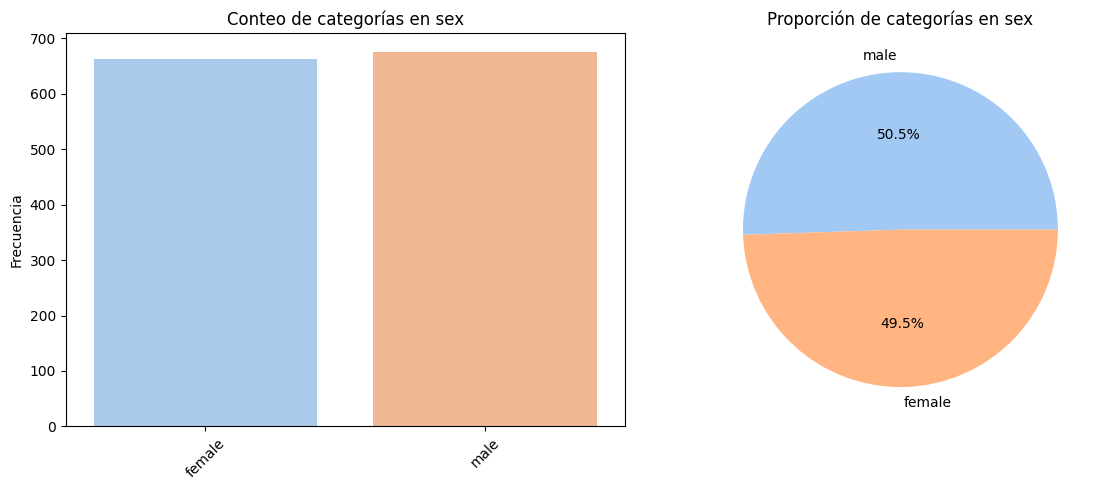

In [ ]:
eda.plot_categorical_data(total_data)

Analisis de datos:
1. sex: La distribucion entre hombres y mujeres es bastante equilibrada, aunque puede haber una ligera predominancia de un sexo sobre otro. Esto indica que el dataset tiene representación de ambos generos para el analisis.

2. Fumador smoker: Hay una mayoría clara de no fumadores frente a fumadores. Esto es importante porque fumar suele influir significativamente en los costos del seguro médico, y la diferencia en proporciones puede afectar el modelo.

3. Región region: Las cuatro regiones (southwest, southeast, northwest, northeast) estan representadas, pero puede haber diferencias en la cantidad de datos por región. Esto puede reflejar variaciones geográficas en costos o características de los asegurados.

Correlaciones con la variable objetivo 'charges':
age         0.299008
bmi         0.198341
children    0.067998
dtype: float64


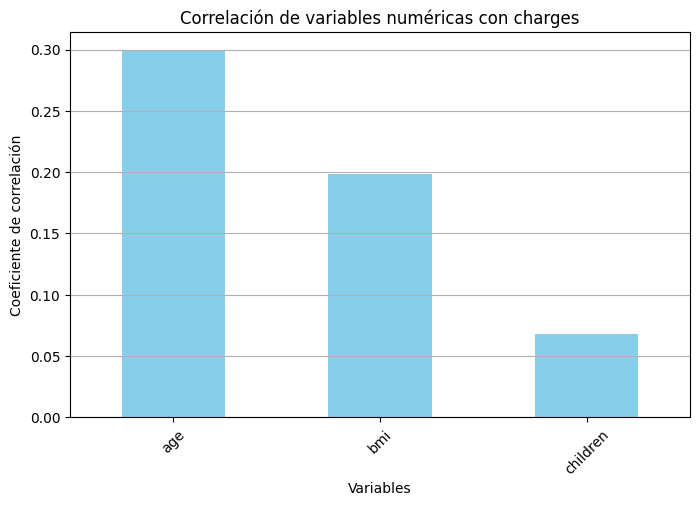

In [ ]:
eda.correlation_num_target(total_data, target)

Analisis de resultados:

Las variables bmi y age son buenos predictores numericos para el charges. La variable children probablemente no aporte mucho valor predictivo en un modelo lineal

In [ ]:

#eda.process_dataframes_shapes(total_data, target)


In [ ]:
# DATASET TOTAL_DATA SIN OUTLAIERS

total_data_no_outliers=total_data.copy()

def adjust_outliers(data, target):
    df_adj = data.copy()
    numeric_cols = df_adj.select_dtypes(include=['float64', 'int64']).columns.drop(target)
    for col in numeric_cols:
        Q1 = df_adj[col].quantile(0.25)
        Q3 = df_adj[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_adj[col] = np.where(df_adj[col] < lower_bound, lower_bound, df_adj[col])
        df_adj[col] = np.where(df_adj[col] > upper_bound, upper_bound, df_adj[col])
    return df_adj

total_data_no_outliers = adjust_outliers(total_data, target='charges')
total_data_no_outliers.head



<bound method NDFrame.head of        age     sex     bmi  children smoker     region      charges
0     19.0  female  27.900       0.0    yes  southwest  16884.92400
1     18.0    male  33.770       1.0     no  southeast   1725.55230
2     28.0    male  33.000       3.0     no  southeast   4449.46200
3     33.0    male  22.705       0.0     no  northwest  21984.47061
4     32.0    male  28.880       0.0     no  northwest   3866.85520
...    ...     ...     ...       ...    ...        ...          ...
1333  50.0    male  30.970       3.0     no  northwest  10600.54830
1334  18.0  female  31.920       0.0     no  northeast   2205.98080
1335  18.0  female  36.850       0.0     no  southeast   1629.83350
1336  21.0  female  25.800       0.0     no  southwest   2007.94500
1337  61.0  female  29.070       0.0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [ ]:
# DATASET TOTAL_DATA CON OUTLAIERS FACTORIZADO
total_data_factorized = total_data.copy()

for col in no_numericas:
    total_data_factorized[col] = total_data_factorized[col].astype('category').cat.codes

total_data_factorized.head

<bound method NDFrame.head of       age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]>

In [ ]:
#DATASET TOTAL_DATA SIN OUTLAIERS FACTORIZADO
total_data_no_outliers_factorized = total_data_no_outliers.copy()

for col in no_numericas:
   total_data_no_outliers_factorized[col] = total_data_no_outliers_factorized[col].astype('category').cat.codes


total_data_no_outliers_factorized.head



<bound method NDFrame.head of        age  sex     bmi  children  smoker  region      charges
0     19.0    0  27.900       0.0       1       3  16884.92400
1     18.0    1  33.770       1.0       0       2   1725.55230
2     28.0    1  33.000       3.0       0       2   4449.46200
3     33.0    1  22.705       0.0       0       1  21984.47061
4     32.0    1  28.880       0.0       0       1   3866.85520
...    ...  ...     ...       ...     ...     ...          ...
1333  50.0    1  30.970       3.0       0       1  10600.54830
1334  18.0    0  31.920       0.0       0       0   2205.98080
1335  18.0    0  36.850       0.0       0       2   1629.83350
1336  21.0    0  25.800       0.0       0       3   2007.94500
1337  61.0    0  29.070       0.0       1       1  29141.36030

[1338 rows x 7 columns]>

In [ ]:
# DATASET TRAIN / TEST TOTAL_DATA CON OUTLAIERS
X = total_data.drop(columns=['charges'])
y = total_data['charges']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Tamaño X_train:", X_train.shape)
print("Tamaño X_test:", X_test.shape)
print("Tamaño y_train:", y_train.shape)
print("Tamaño y_test:", y_test.shape)

Tamaño X_train: (1070, 6)
Tamaño X_test: (268, 6)
Tamaño y_train: (1070,)
Tamaño y_test: (268,)


In [ ]:
#DATASET  TRAIN / TEST TOTAL_DATA_NO_OUTLAIERS

X = total_data_no_outliers.drop(columns=['charges'])
y = total_data_no_outliers['charges']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Tamaño X_train:", X_train.shape)
print("Tamaño X_test:", X_test.shape)
print("Tamaño y_train:", y_train.shape)
print("Tamaño y_test:", y_test.shape)

Tamaño X_train: (1070, 6)
Tamaño X_test: (268, 6)
Tamaño y_train: (1070,)
Tamaño y_test: (268,)


In [ ]:
# DATASET TRAIN / TEST TOTAL_DATA CON OUTLAIERS FACTORIZADO


X = total_data_factorized.drop(columns=['charges'])
y = total_data_factorized['charges']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Tamaño X_train:", X_train.shape)
print("Tamaño X_test:", X_test.shape)
print("Tamaño y_train:", y_train.shape)
print("Tamaño y_test:", y_test.shape)

Tamaño X_train: (1070, 6)
Tamaño X_test: (268, 6)
Tamaño y_train: (1070,)
Tamaño y_test: (268,)


In [ ]:
# DATASET TRAIN / TEST TOTAL_DATA SIN OUTLAIERS FACTORIZADO
total_data_no_outliers_factorized = total_data_no_outliers.copy()

X = total_data_no_outliers_factorized.drop(columns=['charges'])
y = total_data_no_outliers_factorized['charges']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Tamaño X_train:", X_train.shape)
print("Tamaño X_test:", X_test.shape)
print("Tamaño y_train:", y_train.shape)
print("Tamaño y_test:", y_test.shape)

Tamaño X_train: (1070, 6)
Tamaño X_test: (268, 6)
Tamaño y_train: (1070,)
Tamaño y_test: (268,)


In [ ]:
# DATASET ESTANDARIZADOS 

def scal_dataset_standard(dataframe, target):
    df_scaled = dataframe.copy()
    numeric_cols = df_scaled.select_dtypes(include=['float64', 'int64']).columns.drop(target)
    scaler = StandardScaler()
    df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])
    return df_scaled

total_data_standard = scal_dataset_standard(total_data, target)
total_data_no_outliers_standard = scal_dataset_standard(total_data_no_outliers, target)
total_data_factorized_standard = scal_dataset_standard(total_data_factorized, target)
total_data_no_outliers_factorized_standard = scal_dataset_standard(total_data_no_outliers_factorized, target)

print("total_data_standard:")
print(total_data_standard.head(),"\n")

print("total_data_no_outliers_standard:")
print(total_data_no_outliers_standard.head(),"\n")

print("total_data_factorized_standard:")
print(total_data_factorized_standard.head(), "\n")

print("total_data_no_outliers_factorized_standard:")
print(total_data_no_outliers_factorized_standard.head(), "\n")


total_data_standard:
        age     sex       bmi  children smoker     region      charges
0 -1.438764  female -0.453320 -0.908614    yes  southwest  16884.92400
1 -1.509965    male  0.509621 -0.078767     no  southeast   1725.55230
2 -0.797954    male  0.383307  1.580926     no  southeast   4449.46200
3 -0.441948    male -1.305531 -0.908614     no  northwest  21984.47061
4 -0.513149    male -0.292556 -0.908614     no  northwest   3866.85520 

total_data_no_outliers_standard:
        age     sex       bmi  children smoker     region      charges
0 -1.438764  female -0.454201 -0.908614    yes  southwest  16884.92400
1 -1.509965    male  0.515300 -0.078767     no  southeast   1725.55230
2 -0.797954    male  0.388125  1.580926     no  southeast   4449.46200
3 -0.441948    male -1.312218 -0.908614     no  northwest  21984.47061
4 -0.513149    male -0.292342 -0.908614     no  northwest   3866.85520 

total_data_factorized_standard:
        age  sex       bmi  children  smoker  region      

In [ ]:
# DATASET MIN/MAX

def scale_dataset_minmax(dataframe, target):
    df_scaled = dataframe.copy()
    numeric_cols = df_scaled.select_dtypes(include=['float64', 'int64']).columns.drop(target)
    scaler = MinMaxScaler()
    df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])
    return df_scaled

total_data_minmax = scale_dataset_minmax(total_data, target)
total_data_no_outliers_minmax = scale_dataset_minmax(total_data_no_outliers, target)
total_data_factorized_minmax = scale_dataset_minmax(total_data_factorized, target)
total_data_no_outliers_factorized_minmax = scale_dataset_minmax(total_data_no_outliers_factorized, target)

print("total_data_minmax:")
print(total_data_minmax.head(), "\n")

print("total_data_no_outliers_minmax:")
print(total_data_no_outliers_minmax.head(), "\n")

print("total_data_factorized_minmax:")
print(total_data_factorized_minmax.head(), "\n")

print("total_data_no_outliers_factorized_minmax:")
print(total_data_no_outliers_factorized_minmax.head(), "\n")


total_data_minmax:
        age     sex       bmi  children smoker     region      charges
0  0.021739  female  0.321227       0.0    yes  southwest  16884.92400
1  0.000000    male  0.479150       0.2     no  southeast   1725.55230
2  0.217391    male  0.458434       0.6     no  southeast   4449.46200
3  0.326087    male  0.181464       0.0     no  northwest  21984.47061
4  0.304348    male  0.347592       0.0     no  northwest   3866.85520 

total_data_no_outliers_minmax:
        age     sex       bmi  children smoker     region      charges
0  0.021739  female  0.381104       0.0    yes  southwest  16884.92400
1  0.000000    male  0.568465       0.2     no  southeast   1725.55230
2  0.217391    male  0.543888       0.6     no  southeast   4449.46200
3  0.326087    male  0.215289       0.0     no  northwest  21984.47061
4  0.304348    male  0.412384       0.0     no  northwest   3866.85520 

total_data_factorized_minmax:
        age  sex       bmi  children  smoker  region      charge

In [ ]:
# ENTRENAR Y SACAR R2

def train_and_evaluate(df, dataset_name):
    X = df.drop(columns=[target])
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"R² para {dataset_name}: {r2}")
    return r2

# Calcular R2 par total_data_factorized
r2_factorized = train_and_evaluate(total_data_factorized, 'total_data_factorized')

# Calcular R2 par total_data_no_outliers_factorized
r2_no_outliers_factorized = train_and_evaluate(total_data_no_outliers_factorized, 'total_data_no_outliers_factorized')

R² para total_data_factorized: 0.7833463107364539


ValueError: could not convert string to float: 'female'

In [ ]:
# TODOS LOS DATASET FACTORIZADOS R2 / RMSE 

# Lista de tus datasets (asegúrate que están cargados en tu entorno)
datasets = {
    'total_data_factorized': total_data_factorized,
    'total_data_no_outliers_factorized': total_data_no_outliers_factorized,
    'total_data_factorized_standard': total_data_factorized_standard,
    'total_data_no_outliers_factorized_standard': total_data_no_outliers_factorized_standard,
    'total_data_factorized_minmax': total_data_factorized_minmax,
    'total_data_no_outliers_factorized_minmax': total_data_no_outliers_factorized_minmax
}

target = 'charges'

results = []

for name, df in datasets.items():
   
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results.append({
        'Dataset': name,
        'R2': r2,
        'RMSE': rmse
    })

# Crear DataFrame con resultados y ordenar por R2 descendente
results_df = pd.DataFrame(results).sort_values(by='R2', ascending=False).reset_index(drop=True)

print(results_df)

                                      Dataset        R2         RMSE
0                       total_data_factorized  0.782405  5812.170661
1           total_data_no_outliers_factorized  0.782405  5812.170661
2              total_data_factorized_standard  0.782405  5812.170661
3  total_data_no_outliers_factorized_standard  0.782405  5812.170661
4                total_data_factorized_minmax  0.782405  5812.170661
5    total_data_no_outliers_factorized_minmax  0.782405  5812.170661


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np

def train_and_evaluate_lasso_factorized(df, target='charges', alpha=1.0, test_size=0.2, random_state=42):
    """
    Entrena y evalúa un modelo Lasso sobre un dataset factorizado.
    
    Parámetros:
    - df: DataFrame con variables numéricas (factorizadas)
    - target: nombre de la variable objetivo
    - alpha: parámetro de regularización de Lasso
    - test_size: proporción del conjunto de prueba
    - random_state: semilla para reproducibilidad
    
    Retorna:
    - model: modelo entrenado
    - dict con métricas: r2, rmse, mae
    """
    X = df.drop(columns=[target])
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    model = Lasso(alpha=alpha, random_state=random_state)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    

    print(f"Lasso Regression (alpha={alpha})")
    print(f"R²: {r2:.4f}")
    print(f"RMSE: {rmse:.2f}")
    

    return model, {'r2': r2, 'rmse': rmse}

In [ ]:
#0PTIMIZACION  DE PAMETRO LASSO --------------------------------


def train_and_evaluate_lasso(df, target='charges', alpha=1.0):
    # Separar variables categóricas y numéricas
    cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    num_cols = df.select_dtypes(include=['number']).columns.tolist()
    num_cols.remove(target)

    # One-Hot Encoding para variables categóricas
    df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

    # Separar X e y
    X = df_encoded.drop(columns=[target])
    y = df_encoded[target]

    # Dividir en train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Entrenar modelo Lasso
    model = Lasso(alpha=alpha, random_state=42)
    model.fit(X_train, y_train)

    # Predecir y evaluar
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    

    print(f"Lasso Regression (alpha={alpha})")
    print(f"R²: {r2}")
    print(f"RMSE: {rmse}")


    return model, X_train, X_test, y_train, y_test


model, X_train, X_test, y_train, y_test = train_and_evaluate_lasso(total_data, alpha=0.1)


Lasso Regression (alpha=0.1)
R²: 0.7835874745529608
RMSE: 5796.358344217857


In [ ]:
# OPTIMIZACION CON RIDGE 
datasets = {
    'total_data_factorized': total_data_factorized,
    'total_data_no_outliers_factorized': total_data_no_outliers_factorized,
    'total_data_factorized_standard': total_data_factorized_standard,
    'total_data_no_outliers_factorized_standard': total_data_no_outliers_factorized_standard,
    'total_data_factorized_minmax': total_data_factorized_minmax,
    'total_data_no_outliers_factorized_minmax': total_data_no_outliers_factorized_minmax
}
target = 'charges'

results = []


def train_and_evaluate_ridge(df, target='charges', alpha=1.0):
    # Separar variables categóricas y numéricas
    #cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    #num_cols = df.select_dtypes(include=['number']).columns.tolist()
    #num_cols.remove(target)

    # One-Hot Encoding para variables categóricas
    #df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

    # Separar X e y
    X = df.drop(columns=[target])
    y = df[target]

    # Dividir en train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Entrenar modelo Ridge
    model = Ridge(alpha=alpha, random_state=42)
    model.fit(X_train, y_train)

    # Predecir y evaluar
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    

    print(f"Ridge Regression (alpha={alpha})")
    print(f"R²: {r2:.4f}")
    print(f"RMSE: {rmse:.2f}")
    

    return model, X_train, X_test, y_train, y_test


model, X_train, X_test, y_train, y_test = train_and_evaluate_ridge(total_data, alpha=1.0)

ValueError: could not convert string to float: 'female'